In [1]:
import pandas as pd
import numpy as np
import math 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import time

# Question 1

In [100]:
loandata = pd.read_csv('loandata.csv') 
loandata

,field,selectiveCollege,sex,Default,loanAmount,graduationYear
0,STEM,0,Male,No,22907,2005
1,HUMANITIES,0,Male,Yes,60087,2010
2,HUMANITIES,0,Female,No,33149,2011
3,STEM,1,Female,No,33342,2007
4,BUSINESS,0,Male,Yes,55834,2013
...,...,...,...,...,...,...
1995,BUSINESS,0,Female,No,34862,2006
1996,HUMANITIES,0,Female,Yes,51527,2008
1997,STEM,0,Male,No,63594,2012
1998,BUSINESS,1,Female,No,54822,2006


# Question 2-3

In [29]:

loandata_shuffled = shuffle(loandata)

training_data = loandata_shuffled[0:1000]
validation_data = loandata_shuffled[1000:1500]
test_data = loandata_shuffled[1500:2000]

training_data_x = training_data.drop(columns = ['Default'])
training_data_x_dummy = pd.get_dummies(training_data_x)
training_data_y = training_data.Default

validation_data_x = validation_data.drop(columns = ['Default'])
validation_data_x_dummy = pd.get_dummies(validation_data_x)
validation_data_y = validation_data.Default

test_data_x = test_data.drop(columns = ['Default'])
test_data_x_dummy = pd.get_dummies(test_data_x)
test_data_y = test_data.Default

# Question 4

In [106]:
#?


828      No
411     Yes
498      No
673      No
1770    Yes
       ... 
1274    Yes
1637     No
265      No
446      No
463      No
Name: Default, Length: 500, dtype: object

# Question 5 

In [97]:
#6
clf = DecisionTreeClassifier() # 
clf.fit(training_data_x_dummy,training_data_y)
max_depth = clf.get_depth()
best_depth = 0
best_score = 0
for depth in range(1,1000):
    clf = DecisionTreeClassifier(max_depth=depth) 
    clf.fit(training_data_x_dummy,training_data_y)
    if best_score < clf.score(validation_data_x_dummy,validation_data_y):
        best_score = clf.score(validation_data_x_dummy,validation_data_y)
        best_depth = depth
print('The best maximum depth is',best_depth,', while the best score is',best_score)
clf = DecisionTreeClassifier(max_depth=best_depth)
clf.fit(training_data_x_dummy,training_data_y)

score_training = clf.score(training_data_x_dummy,training_data_y)
print('The accuracy rate of using this classifier to predict training data is',score_training)

score_validation = clf.score(validation_data_x_dummy,validation_data_y)
print('The accuracy rate of using this classifier to predict validation data is',score_validation)

score_test = clf.score(test_data_x_dummy,test_data_y)
print('The accuracy rate of using this classifier to predict test data is',score_test)



The best maximum depth is 3 , while the best score is 0.874
The accuracy rate of using this classifier to predict training data is 0.876
The accuracy rate of using this classifier to predict validation data is 0.874
The accuracy rate of using this classifier to predict test data is 0.866


In [98]:
# Q5 explanation
# to calculate defalut max_depth, and corresponding accuracy rate for training set
alf = DecisionTreeClassifier() # 
alf.fit(training_data_x_dummy,training_data_y)
alf.get_depth()

best_score_training = alf.score(training_data_x_dummy,training_data_y)
best_depth_training = alf.get_depth()
print('The best max_depth that achieve highest accuracy rate for training data is',best_depth_training, ". This corresponding accuracy rate is ",best_score_training )

# use the default max_depth to calculate accuracy rate for validation set
DecTree = DecisionTreeClassifier(max_depth=19) 
DecTree.fit(training_data_x_dummy, training_data_y)
validation_Score=DecTree.score(validation_data_x_dummy,validation_data_y)

print('The validation accuracy with depth=19 is',validation_Score,", which is lower than what we have previously. This is due to over-fitting problem")
print("In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data ")
print("However this means that your model will fit perfectly good with training data, but will not generate good prediction for testing. Hence we should use validation dataset to determine the proper max_depth of the model")

The best max_depth that achieve highest accuracy rate for training data is 19 . This corresponding accuracy rate is  1.0
The validation accuracy with depth=19 is 0.832 , which is lower than what we have previously. This is due to over-fitting problem
In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data 
However this means that your model will fit perfectly good with training data, but will not generate good prediction for testing. Hence we should use validation dataset to determine the proper max_depth of the model


# Question 6

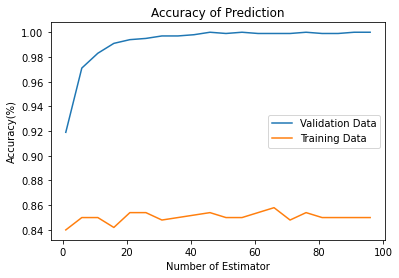

In [110]:
estimator_list = np.arange(1,100, 5).tolist()
scores_list_training = []
scores_list_validation = []
training_time = []
for k in estimator_list:
    clf = RandomForestClassifier(n_estimators=k)
    start = time.time()
    clf.fit(training_data_x_dummy, training_data_y)
    end = time.time()
    scores_list_training.append(clf.score(training_data_x_dummy,training_data_y))
    scores_list_validation.append(clf.score(validation_data_x_dummy,validation_data_y))
    training_time.append(end-start)
scores_list_df = pd.DataFrame(data=estimator_list,columns=['Number of Estimator'])
scores_list_df['Score of training data'] = scores_list_training
scores_list_df['Score of validation data'] = scores_list_validation
scores_list_df['Training time'] = training_time
plt.plot(scores_list_df['Number of Estimator'], scores_list_df['Score of training data'], label = "Validation Data")
plt.plot(scores_list_df['Number of Estimator'], scores_list_df['Score of validation data'], label = "Training Data")
plt.title('Accuracy of Prediction')
plt.xlabel('Number of Estimator')
plt.ylabel('Accuracy(%)')
plt.legend()

# Question 7

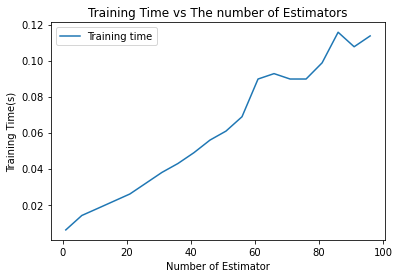

In [111]:
plt.plot(scores_list_df['Number of Estimator'], scores_list_df['Training time'], label = "Training time")
plt.title('Training Time vs The number of Estimators')
plt.xlabel('Number of Estimator')
plt.ylabel('Training Time(s)')
plt.legend()

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]